In [26]:
import sqlite3
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import numpy as np

load_dotenv("../../credentials/credentials.env")
pvc_db_path = os.getenv("PVC_LOG_DB_PATH")
print(pvc_db_path)

# Connect to your database
conn = sqlite3.connect(pvc_db_path)

# Adjust query as needed
query = "SELECT name, world, x, z, time FROM player_locations WHERE name LIKE '%nacho%' OR name LIKE '%may%' ORDER BY  time"
df = pd.read_sql_query(query, conn)

conn.close()


/home/lithium/GridBotUltimate/source/processes/pvc_download/pvc_log.db


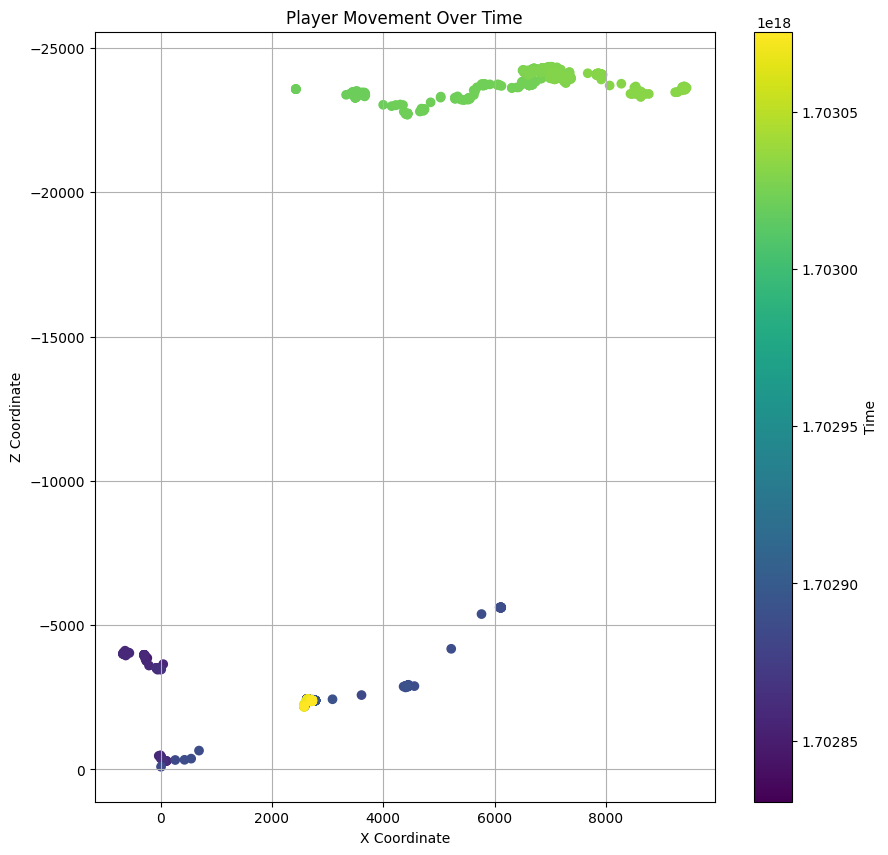

In [27]:
plt.figure(figsize=(10, 10))

# Assuming 'time' column is convertible to a numerical format
# Normalize time for color mapping
time_values = pd.to_datetime(df['time']).view(np.int64)
norm = plt.Normalize(time_values.min(), time_values.max())

# Create a scatter plot
plt.scatter(df['x'], df['z'], c=time_values, cmap='viridis', norm=norm)

plt.colorbar(label='Time')  # Adds a color bar representing time

plt.title('Player Movement Over Time')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.grid(True)

# Optional: reverse the axis directions
plt.gca().invert_yaxis()

plt.savefig('player_movement.png')
# plt.show()


/tmp/ipykernel_510476/2063702585.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(group['x']*8, group['z']*8, color=world_colors.get(world, 'black'), norm=norm, label=f"{name} ({world})")
/tmp/ipykernel_510476/2063702585.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(group['x'], group['z'], cmap='viridis', label=f"{name} ({world})", norm=norm)


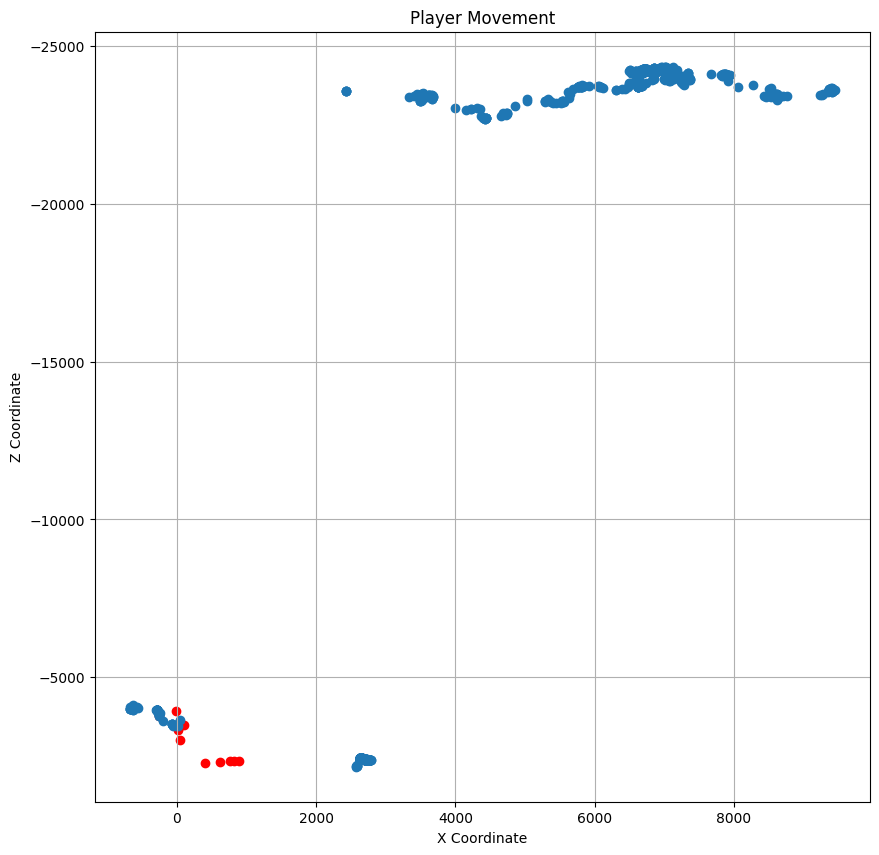

In [20]:

# Define different colors for different worlds
world_colors = {'o': 'blue', 'n': 'red', 'minecraft_the_end': 'green'}

# Add a column to track changes in world/teleportation
df['world_change'] = df['world'] != df['world'].shift(1)
df['segment'] = df['world_change'].cumsum()

plt.figure(figsize=(10, 10))

time_values = pd.to_datetime(df['time']).view(np.int64)
norm = plt.Normalize(time_values.min(), time_values.max())

for (name, world), group in df.groupby(['name', 'world']):
    if world == 'n':
        print()
        plt.scatter(group['x']*8, group['z']*8, color=world_colors.get(world, 'black'), norm=norm, label=f"{name} ({world})")
    else:
        plt.scatter(group['x'], group['z'], cmap='viridis', label=f"{name} ({world})", norm=norm)


# Group by player, then by world, then by segment
# for (name, world), group in df.groupby(['name', 'world']):

    # for segment, segment_group in group.groupby('segment'):
    #     if world == 'n':
    #         plt.plot(segment_group['x']*8, segment_group['z']*8, color=world_colors.get(world, 'black'), label=f"{name} ({world})")
    #     else:
    #         plt.plot(segment_group['x'], segment_group['z'], color=world_colors.get(world, 'black'), label=f"{name} ({world})")

plt.title('Player Movement')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.grid(True)

plt.gca().invert_yaxis()

# Save or display the plot
plt.savefig('player_movement.png')
# plt.show()
